# Data Understanding
## Data Semantics

### Type of attributes

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
# The dataset contains 24 columns and 20000 observations
df = pd.read_csv('train.csv')
df.shape

(15000, 24)

In [209]:
df.reset_index(inplace=True)

In [210]:
# check types of features and data integrity (whether we have missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  15000 non-null  int64  
 1   name                   15000 non-null  object 
 2   duration_ms            15000 non-null  int64  
 3   explicit               15000 non-null  bool   
 4   popularity             15000 non-null  int64  
 5   artists                15000 non-null  object 
 6   album_name             15000 non-null  object 
 7   danceability           15000 non-null  float64
 8   energy                 15000 non-null  float64
 9   key                    15000 non-null  int64  
 10  loudness               15000 non-null  float64
 11  mode                   10550 non-null  float64
 12  speechiness            15000 non-null  float64
 13  acousticness           15000 non-null  float64
 14  instrumentalness       15000 non-null  float64
 15  li

In [211]:
# check the first 5 rows of the dataset
df.head()

,index,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,...,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,...,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


In [213]:
# remove index column due to no meaning
df = df.drop('index', axis=1)

In [214]:
# find unique values of categorical attributes
disc_col = []
for column in df.columns:
    if df[column].dtypes == object and df[column].dtypes == bool:
        print(f"{column} : \t {df[column].unique()}")
        disc_col.append(column)
        print("====================================")

In [215]:
# check for duplicates
dup=df.drop_duplicates()
dup.shape

(15000, 24)

In [216]:
# statistical properties only for numerical attributes
df.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,10550.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,12938.000000,15000.000000,15000.00000,2217.000000,15000.000000
mean,2.468075e+05,27.423667,0.551063,0.656231,5.287867,-8.894999,0.631374,0.083779,0.303896,0.286734,0.216790,0.436853,123.116544,2.467947e+05,3.876179,501.862333,128.39340,0.490479,2.199647
std,1.279941e+05,18.587534,0.194239,0.264371,3.585023,6.005799,0.482455,0.086709,0.329536,0.382930,0.195295,0.277220,31.930958,1.279850e+05,0.566491,280.689804,75.11391,0.291330,1.212616
min,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.587000e+03,0.000000,0.000000,0.00000,0.000000,0.748116
25%,1.800000e+05,14.000000,0.441000,0.480000,2.000000,-10.636250,0.000000,0.037300,0.009745,0.000000,0.097900,0.196000,99.939000,1.800000e+05,4.000000,327.000000,83.00000,0.230000,1.170953
50%,2.278260e+05,24.000000,0.580000,0.709000,5.000000,-7.303000,1.000000,0.051000,0.155000,0.003130,0.131000,0.416000,124.188000,2.278185e+05,4.000000,461.000000,117.00000,0.480000,1.738916
75%,2.889030e+05,42.000000,0.695000,0.884000,8.000000,-5.101000,1.000000,0.088600,0.573000,0.744000,0.280000,0.664000,141.986500,2.889030e+05,4.000000,625.000000,159.00000,0.739000,3.349057
max,4.120258e+06,94.000000,0.980000,1.000000,11.000000,3.156000,1.000000,0.939000,0.996000,1.000000,0.994000,0.995000,220.525000,4.120258e+06,5.000000,7348.000000,2170.00000,1.000000,4.067086


In [217]:
# Include only string columns in description
df.describe(include=[object])

,name,artists,album_name,genre
count,15000,15000,15000,15000
unique,15000,6257,9820,20
top,Long Road,Vybz Kartel,The Hardcore Archive Part 3 (1997),j-dance
freq,1,80,32,750


In [218]:
# array with numerical features
numerical_cols= ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 
                                    'loudness', 'mode', 'speechiness', 'acousticness',
                                   'instrumentalness', 'liveness', 'valence', 
                                    'tempo' , 'features_duration_ms' , 'time_signature','n_beats','n_bars','processing']

In [219]:
# array with categorical features
categorical_cols= ['name','artists', 'album_name', 'genre']

In [220]:
# include only boolean columns in description
df.describe(include=[bool])

,explicit
count,15000
unique,2
top,False
freq,14034


### Missing value 

In [221]:
# count of null values for each attribute
df.isnull().sum(axis=0)

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64

<Axes: >

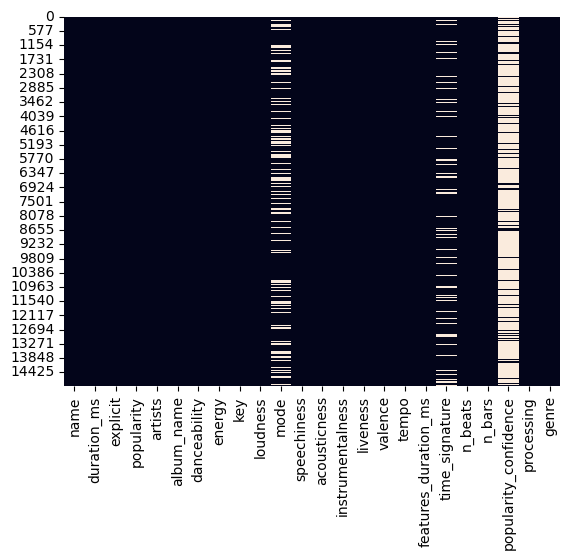

In [222]:
sns.heatmap(df.isnull(), cbar=False)

In [223]:
# remove popularity_confidence colume due to losting many values
df_1 = df.drop(columns=['popularity_confidence'], axis=1)
df_1

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.536000,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.934000,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.800000,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.001270,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.096900,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.615000,0.1320,0.0335,117.319,432027,NaN,837.0,212.0,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.940000,0.1230,0.0016,92.323,182747,3.0,277.0,92.0,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.857000,0.0713,0.0708,126.000,400091,4.0,837.0,209.0,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.000014,0.4020,0.2700,160.044,197250,4.0,513.0,130.0,1.279305,breakbeat


In [224]:
df_1.describe(include=[float])

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing
count,15000.000000,15000.000000,15000.000000,10550.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,12938.000000,15000.000000,15000.00000,15000.000000
mean,0.551063,0.656231,-8.894999,0.631374,0.083779,0.303896,0.286734,0.216790,0.436853,123.116544,3.876179,501.862333,128.39340,2.199647
std,0.194239,0.264371,6.005799,0.482455,0.086709,0.329536,0.382930,0.195295,0.277220,31.930958,0.566491,280.689804,75.11391,1.212616
min,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.748116
25%,0.441000,0.480000,-10.636250,0.000000,0.037300,0.009745,0.000000,0.097900,0.196000,99.939000,4.000000,327.000000,83.00000,1.170953
50%,0.580000,0.709000,-7.303000,1.000000,0.051000,0.155000,0.003130,0.131000,0.416000,124.188000,4.000000,461.000000,117.00000,1.738916
75%,0.695000,0.884000,-5.101000,1.000000,0.088600,0.573000,0.744000,0.280000,0.664000,141.986500,4.000000,625.000000,159.00000,3.349057
max,0.980000,1.000000,3.156000,1.000000,0.939000,0.996000,1.000000,0.994000,0.995000,220.525000,5.000000,7348.000000,2170.00000,4.067086


In [20]:
# find the range of numerical columns
for col in numerical_cols:
    c=df_1[col].unique()
    c.sort(axis=0)
    print(f"{col} has: {c} unique values" )

duration_ms has: [   8586   13386   15800 ... 3600014 3601693 4120258] unique values
popularity has: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 88 94] unique values
danceability has: [0.     0.0532 0.0545 ... 0.974  0.979  0.98  ] unique values
energy has: [0.00e+00 2.01e-05 2.02e-05 ... 9.98e-01 9.99e-01 1.00e+00] unique values
key has: [ 0  1  2  3  4  5  6  7  8  9 10 11] unique values
loudness has: [-49.531 -46.591 -46.251 ...   1.7     1.795   3.156] unique values
mode has: [ 0.  1. nan] unique values
speechiness has: [0.     0.0228 0.0229 ... 0.924  0.931  0.939 ] unique values
acousticness has: [0.00e+00 1.00e-06 1.01e-06 ... 9.94e-01 9.95e-01 9.96e-01] unique values
instrumentalness has: [0.00e+00 1.00e-06 1.03e-06 ... 9.98e-01 9.99e-01 1.00e+00] unique values
li

In [121]:
df_1['artists'].nunique()

6257

## Distribution of the variables and statistics


### Visualization the distribution of data

array([[<Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'features_duration_ms'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'n_beats'}>],
       [<Axes: title={'center': 'n_bars'}>,
        <Axes: title={'center': 'processing'}>, <Axes: >, <Axes: >]],
      dtype=object)

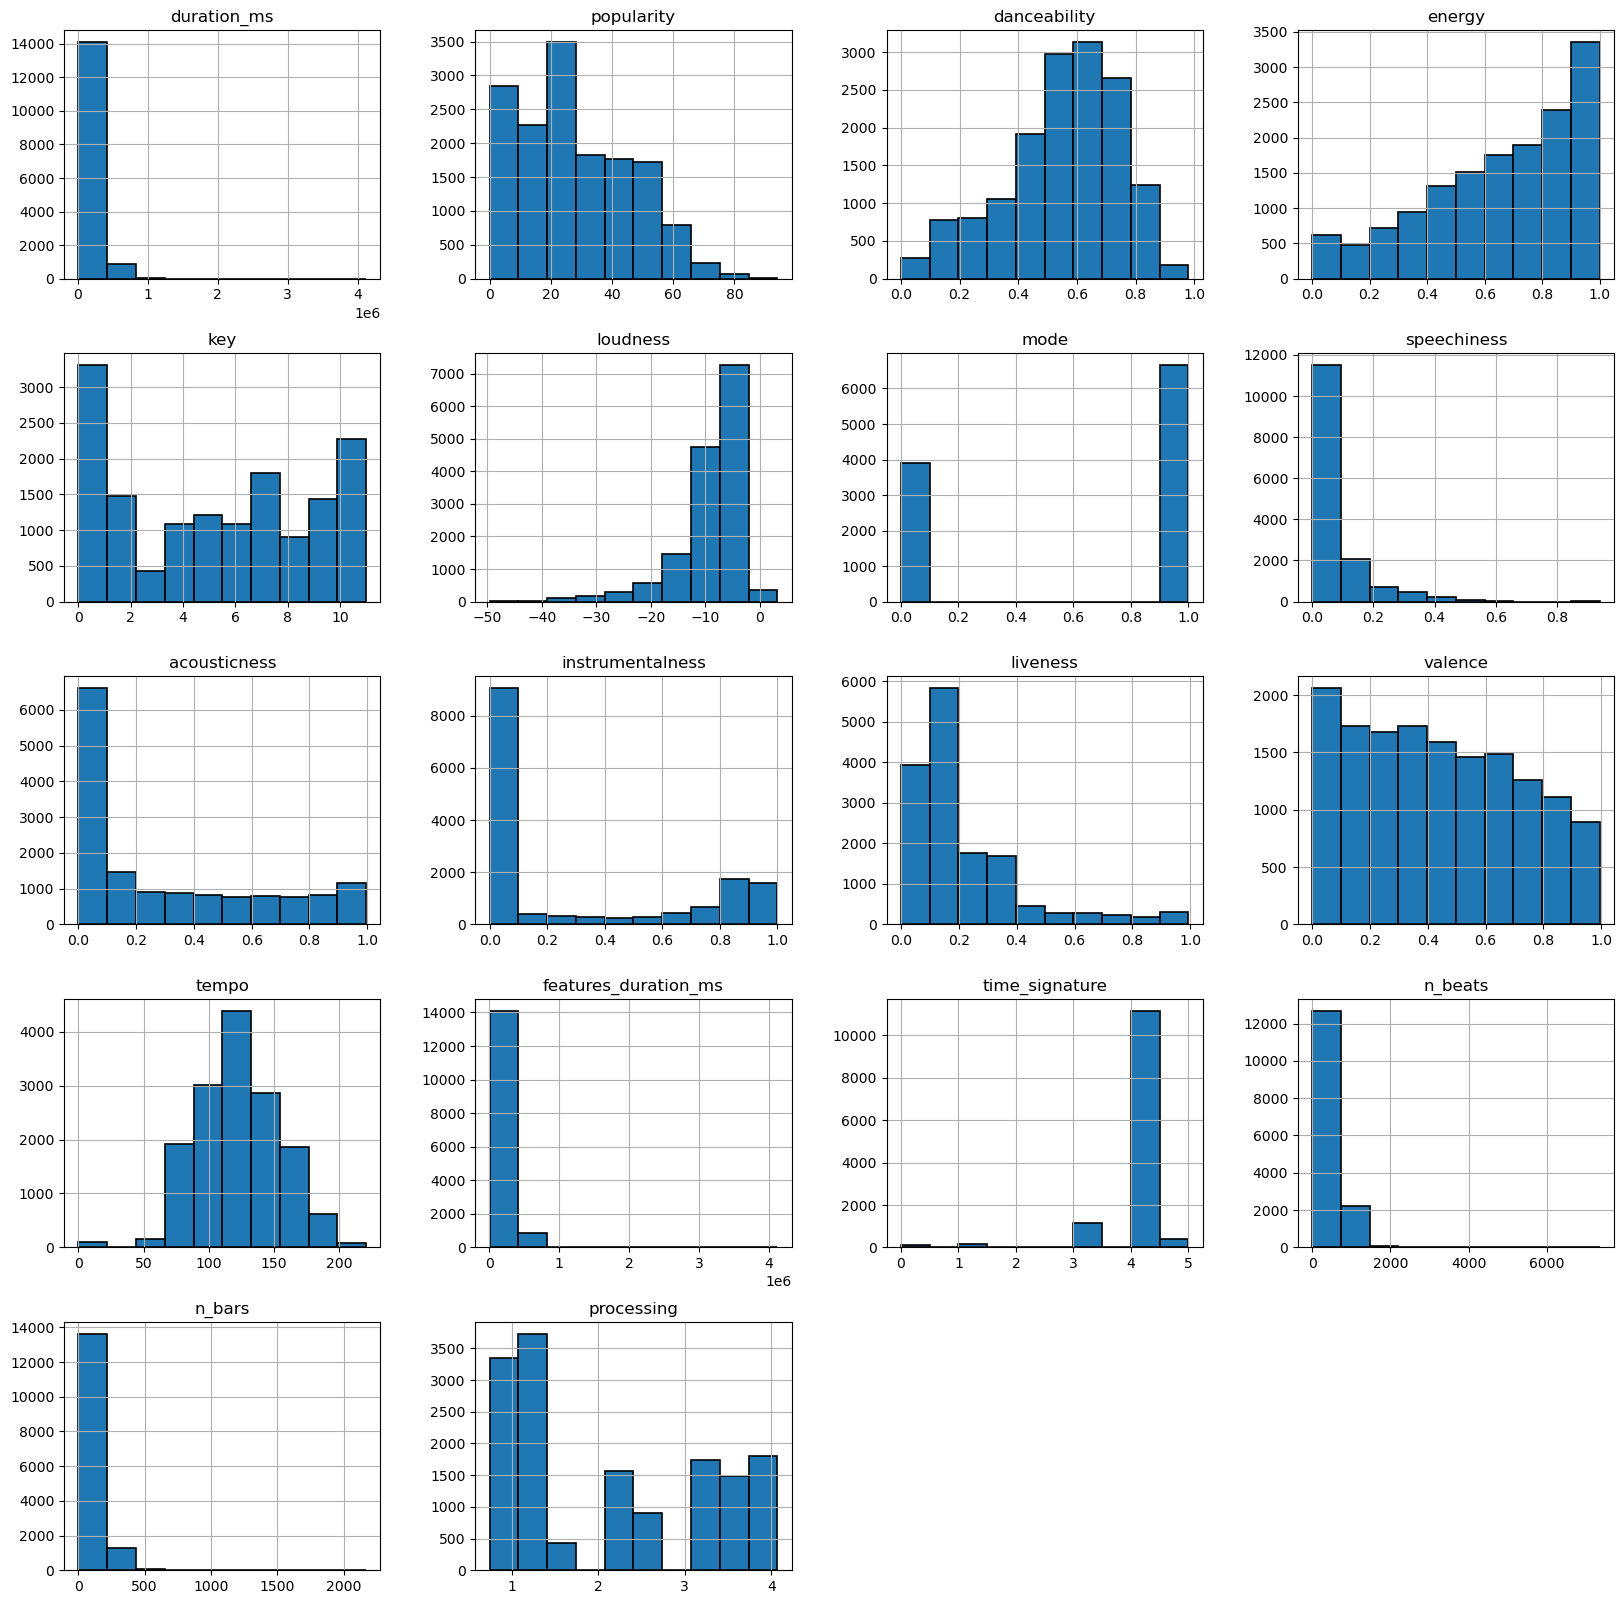

In [122]:
# visualize the distribution of numerical data using histograms
df_1.hist(edgecolor='black', column= numerical_cols, linewidth=1.2, figsize=(20, 20))

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'tempo'}>]], dtype=object)

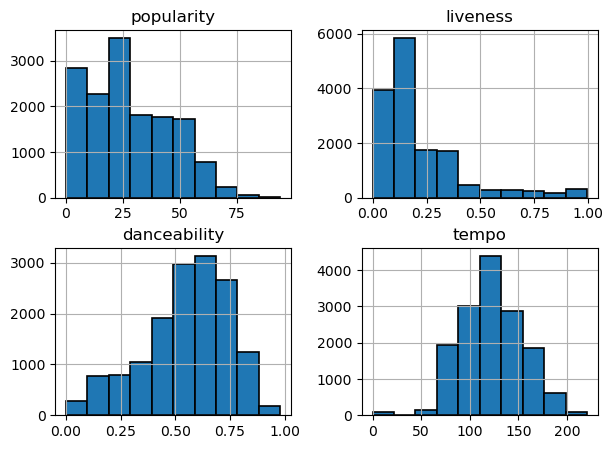

In [204]:
df_1.hist(edgecolor='black', column= ['popularity','liveness', 'danceability','tempo'],  linewidth=1.2, figsize=(7, 5))


array([[<Axes: title={'center': 'liveness'}>]], dtype=object)

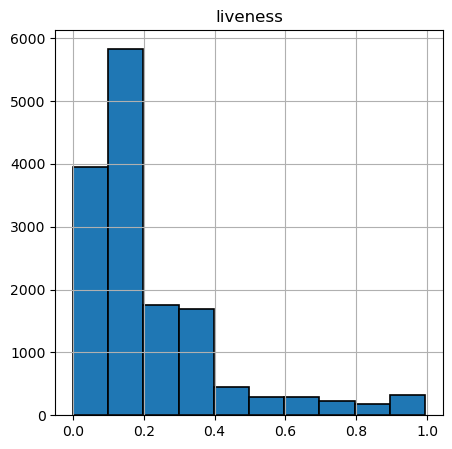

In [200]:
df_1.hist(edgecolor='black', column= 'liveness', linewidth=1.2, figsize=(5, 5))

array([[<Axes: title={'center': 'danceability'}>]], dtype=object)

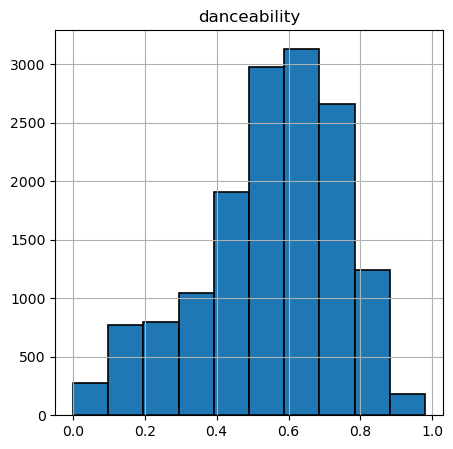

In [198]:
df_1.hist(edgecolor='black', column= 'danceability', linewidth=1.2, figsize=(5, 5))

array([[<Axes: title={'center': 'tempo'}>]], dtype=object)

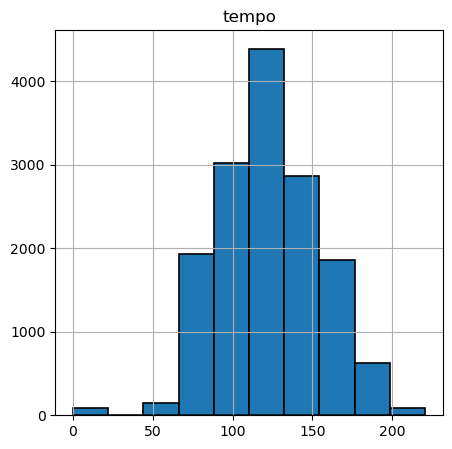

In [199]:
df_1.hist(edgecolor='black', column= 'tempo', linewidth=1.2, figsize=(5, 5))

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

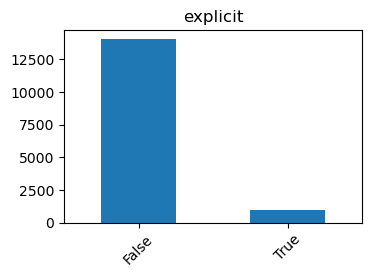

In [206]:
# bar plots for categorical features
fig = plt.figure(figsize=(20,20))
fig_dims = (6,4)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot2grid(fig_dims, (0,2))
df_1['explicit'].value_counts().plot(kind='bar', title='explicit')
plt.xticks(rotation=45)

In [124]:
# value of explicit
df_1['explicit'].value_counts()

False    14034
True       966
Name: explicit, dtype: int64

In [125]:
# crosstable of genre and explicit
genre_xt = pd.crosstab(df_1['genre'], df_1['explicit'])
genre_xt

explicit,False,True
genre,,
afrobeat,736,14
black-metal,644,106
bluegrass,747,3
brazil,690,60
breakbeat,706,44
chicago-house,732,18
disney,750,0
forro,736,14
happy,662,88


In [126]:
# value of top 10 artists
df_1['artists'].value_counts().head(10)

Vybz Kartel                    80
Germaine Franco                75
Scooter                        74
Sarah, the Illstrumentalist    69
Jay Chou                       67
The Prophet                    64
Alphaxone                      56
Shiritsu Ebisu Chugaku         53
Nogizaka46                     53
Rammstein                      53
Name: artists, dtype: int64

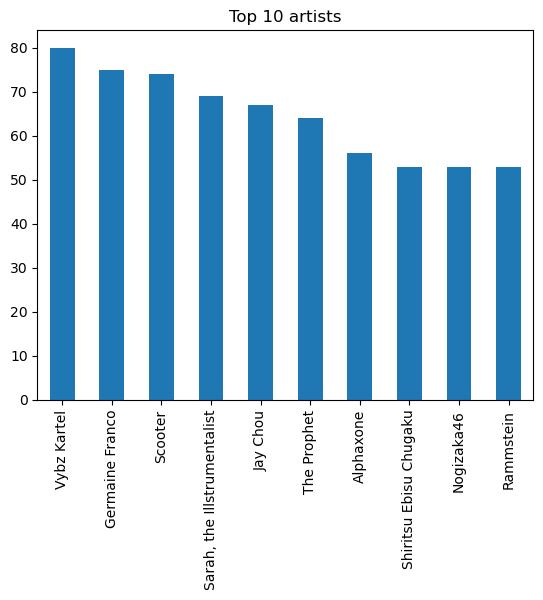

In [127]:
# Visualize the top 10 artist have the most track
df_1['artists'].value_counts().head(10).plot(kind='bar', title='Top 10 artists')
plt.show()

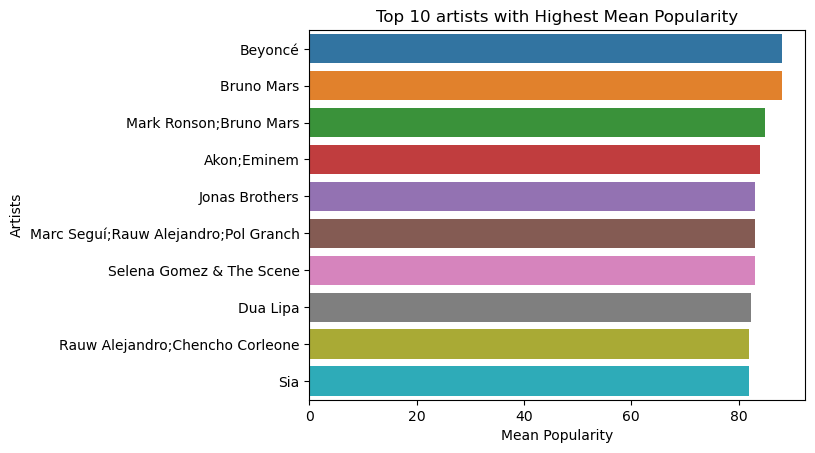

In [128]:
# bar Plot of Artist with Top 10 Popularity
top10_artists_name = df_1.groupby('artists')['popularity'].mean().nlargest(10)
sns.barplot(x=top10_artists_name.values, y=top10_artists_name.index, orient='h')
plt.xlabel('Mean Popularity')
plt.ylabel('Artists')
plt.title('Top 10 artists with Highest Mean Popularity')
plt.show()

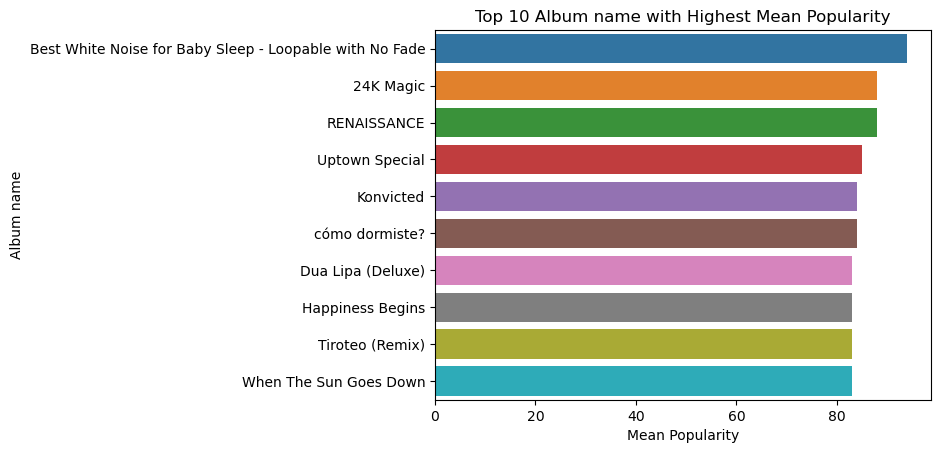

In [129]:
# Bar Plot of Album with Top 10 Popularity
top10_album_name = df_1.groupby('album_name')['popularity'].mean().nlargest(10)
sns.barplot(x=top10_album_name.values, y=top10_album_name.index, orient='h')
plt.xlabel('Mean Popularity')
plt.ylabel('Album name')
plt.title('Top 10 Album name with Highest Mean Popularity')
plt.show()

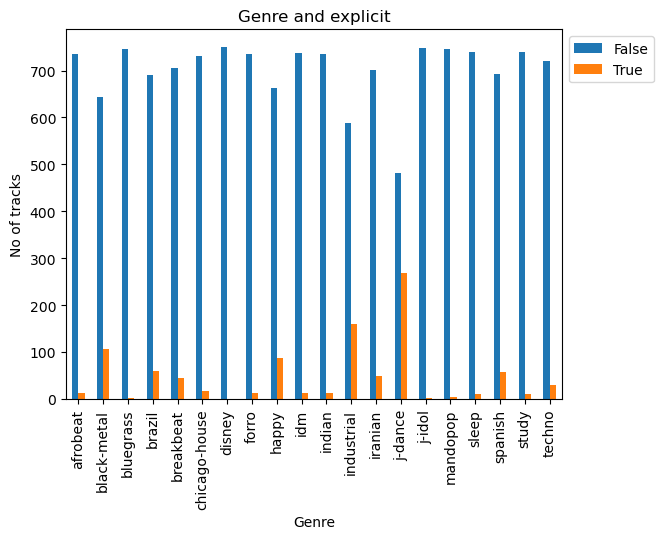

In [130]:
# plot Genre and explicit
a = genre_xt.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('No of tracks')
plt.title('Genre and explicit')
a.legend(bbox_to_anchor=(1, 1))
plt.show(a)

In [131]:
# check duplicate
df[df.duplicated()]

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre


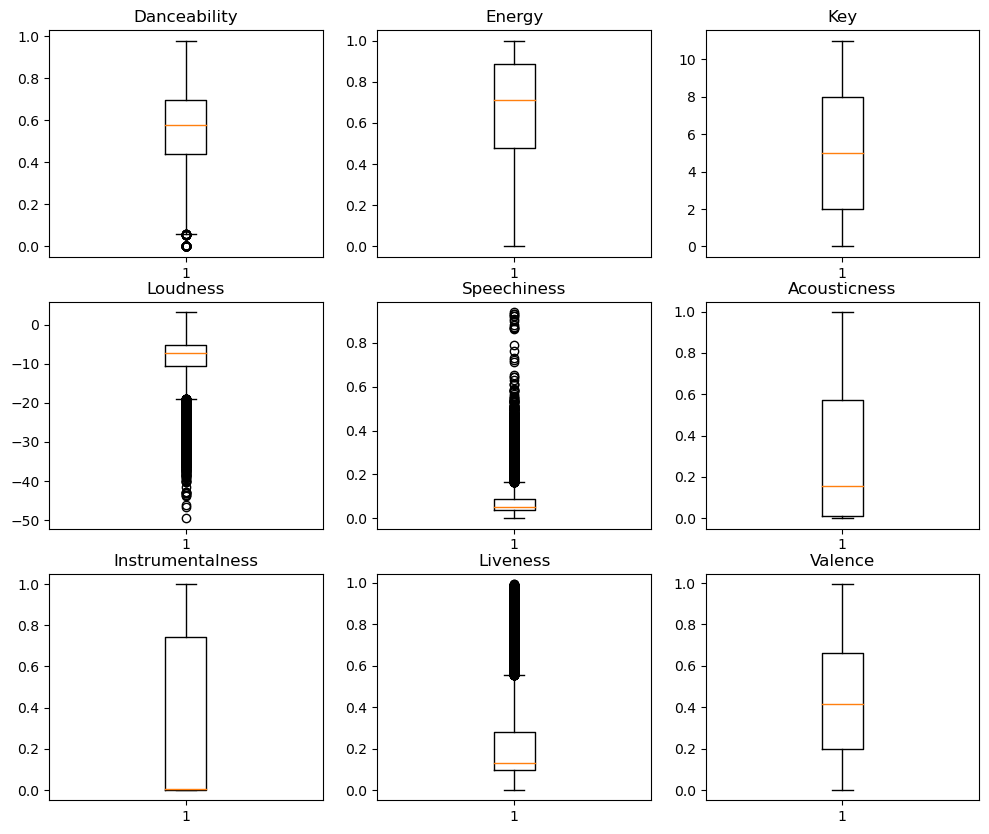

In [134]:
# box plot
plt.figure(figsize=(12,10))
plt.subplot(3,3,1)
plt.boxplot(df['danceability'])
plt.title('Danceability')
plt.subplot(3,3,2)
plt.boxplot(df['energy'])
plt.title('Energy')
plt.subplot(3,3,3)
plt.boxplot(df['key'])
plt.title('Key')
plt.subplot(3,3,4)
plt.boxplot(df['loudness'])
plt.title('Loudness')
plt.subplot(3,3,5)
plt.boxplot(df['speechiness'])
plt.title('Speechiness')
plt.subplot(3,3,6)
plt.boxplot(df['acousticness'])
plt.title('Acousticness')
plt.subplot(3,3,7)
plt.boxplot(df['instrumentalness'])
plt.title('Instrumentalness')
plt.subplot(3,3,8)
plt.boxplot(df['liveness'])
plt.title('Liveness')
plt.subplot(3,3,9)
plt.boxplot(df['valence'])
plt.title('Valence')
plt.show()

Text(0.5, 1.0, 'Tempo')

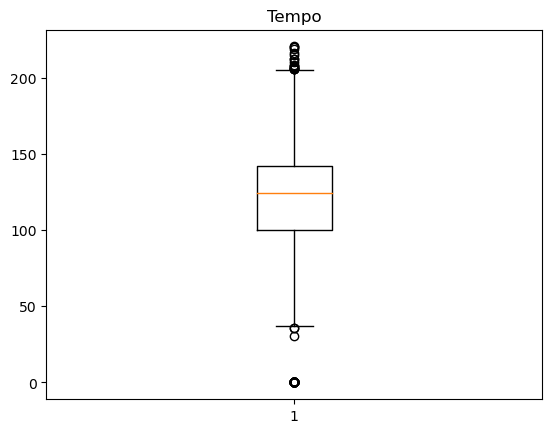

In [135]:
plt.boxplot(df['tempo'])
plt.title('Tempo')

### Correlation 

C:\Users\minhd\AppData\Local\Temp\ipykernel_13184\1044733425.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_1.corr(), annot=True, fmt='.1g', cmap="Greens_r", cbar=False);


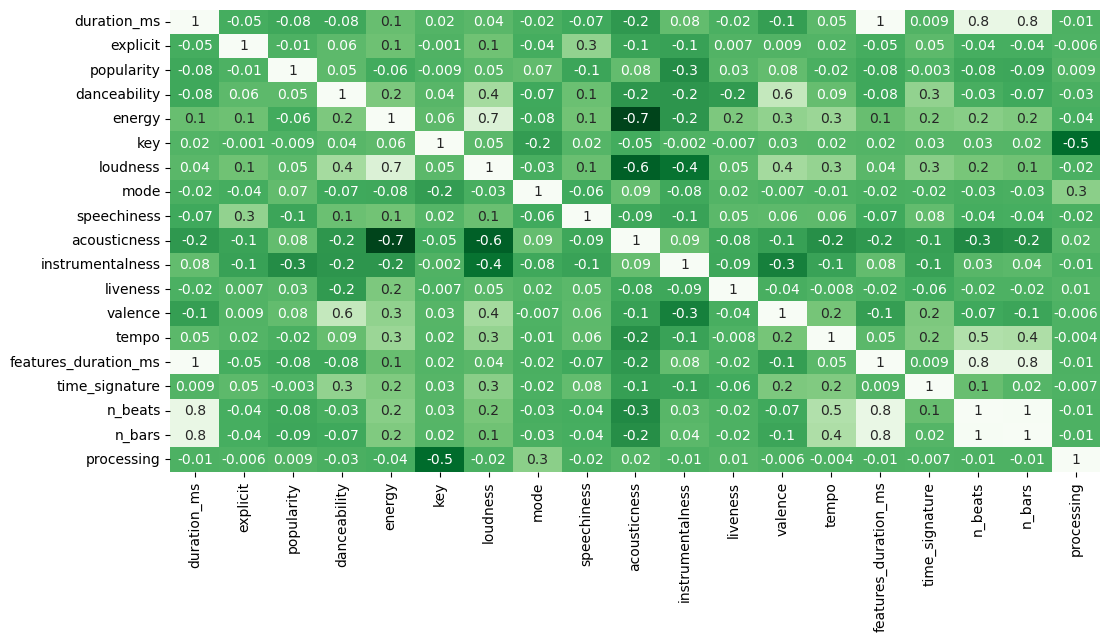

In [225]:
# visualize a look at the correlation matrix 
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df_1.corr(), annot=True, fmt='.1g', cmap="Greens_r", cbar=False);

In [226]:
# default it is track's correlation coefficient (measure for linear relationship between numerical attributes)
df_1.corr(numeric_only = True) 

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,processing
duration_ms,1.000000,-0.048723,-0.076202,-0.080932,0.102996,0.016712,0.039403,-0.023310,-0.074774,-0.184902,0.079685,-0.021184,-0.141938,0.048765,0.999918,0.009033,0.839313,0.838041,-0.010400
explicit,-0.048723,1.000000,-0.013096,0.056992,0.124405,-0.000991,0.131777,-0.042846,0.294287,-0.113975,-0.125101,0.006995,0.008631,0.016972,-0.048699,0.051260,-0.039830,-0.039435,-0.005878
popularity,-0.076202,-0.013096,1.000000,0.051046,-0.056547,-0.008992,0.046703,0.073043,-0.096382,0.078424,-0.266843,0.027105,0.077652,-0.024162,-0.076228,-0.003160,-0.084774,-0.089134,0.008733
danceability,-0.080932,0.056992,0.051046,1.000000,0.193940,0.035311,0.385244,-0.072422,0.111454,-0.199082,-0.202316,-0.174193,0.559578,0.092267,-0.080891,0.292167,-0.033604,-0.069332,-0.026273
energy,0.102996,0.124405,-0.056547,0.193940,1.000000,0.057815,0.720907,-0.079969,0.143454,-0.699454,-0.203111,0.191024,0.284069,0.331538,0.102985,0.204646,0.243586,0.208615,-0.037847
key,0.016712,-0.000991,-0.008992,0.035311,0.057815,1.000000,0.047718,-0.157515,0.018157,-0.049867,-0.001532,-0.007420,0.028221,0.022414,0.016786,0.028388,0.027133,0.022042,-0.490366
loudness,0.039403,0.131777,0.046703,0.385244,0.720907,0.047718,1.000000,-0.033544,0.109793,-0.552519,-0.447106,0.047502,0.377743,0.308203,0.039415,0.250568,0.165565,0.131064,-0.020563
mode,-0.023310,-0.042846,0.073043,-0.072422,-0.079969,-0.157515,-0.033544,1.000000,-0.064289,0.085246,-0.080035,0.015738,-0.006907,-0.013001,-0.023409,-0.019378,-0.030685,-0.027687,0.261129
speechiness,-0.074774,0.294287,-0.096382,0.111454,0.143454,0.018157,0.109793,-0.064289,1.000000,-0.087997,-0.115803,0.050034,0.056068,0.062161,-0.074722,0.080739,-0.043217,-0.040820,-0.022909
acousticness,-0.184902,-0.113975,0.078424,-0.199082,-0.699454,-0.049867,-0.552519,0.085246,-0.087997,1.000000,0.094256,-0.075924,-0.131961,-0.244244,-0.184846,-0.139706,-0.283324,-0.248164,0.022684


### Missing values

In [227]:
# merge duration_ms and features_duration_ms together due to same indicator of correlation, so we drop one column
df_2 = df_1.drop(columns=['features_duration_ms'], axis=1)
df_2.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.302000,0.53600,0.281,0.6350,142.221,4.0,567.0,141.0,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.283000,0.93400,0.360,0.0336,75.596,4.0,617.0,155.0,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.000089,0.80000,0.262,0.4890,116.628,4.0,652.0,162.0,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.066400,0.00127,0.117,0.3850,140.880,4.0,619.0,155.0,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.000576,0.09690,0.299,0.6370,143.956,4.0,733.0,183.0,4.067086,happy


In [228]:
# Count of null values for each attribute
df_2.isnull().sum(axis = 0)

name                   0
duration_ms            0
explicit               0
popularity             0
artists                0
album_name             0
danceability           0
energy                 0
key                    0
loudness               0
mode                4450
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature      2062
n_beats                0
n_bars                 0
processing             0
genre                  0
dtype: int64

All the time_signature and mode missing values are already included in the popularity_confidence attribute. In fact, if we count all the rows where both the attributes are null:

In [229]:
df_2[df_2['mode'].isnull() & df_2['time_signature'].isnull()].isnull().count()

name                617
duration_ms         617
explicit            617
popularity          617
artists             617
album_name          617
danceability        617
energy              617
key                 617
loudness            617
mode                617
speechiness         617
acousticness        617
instrumentalness    617
liveness            617
valence             617
tempo               617
time_signature      617
n_beats             617
n_bars              617
processing          617
genre               617
dtype: int64

#### Time signature

In [230]:
# check time_signature's row are null
df_2[df_2['time_signature'].isnull()]

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
8,Shhhh Baby Shusher Mama Shushing Background Fa...,116815,False,45,Baby Sleep;Baby Shushing;Dreams of Dreams,Shhhh Baby Shusher Mama Shushing Background Fa...,0.153,0.119,6,-25.160,...,0.704000,0.913000,0.5430,0.0342,84.886,NaN,162.0,40.0,1.170953,sleep
15,Escalate,220666,False,25,X-RX,Activate the Machinez,0.529,0.990,9,-4.075,...,0.000821,0.074300,0.3060,0.5890,135.989,NaN,488.0,121.0,1.343558,industrial
20,Beqaaboo,187266,False,53,OAFF;Savera;Shalmali Kholgade;Kausar Munir,Gehraiyaan (Original Motion Picture Soundtrack),0.679,0.663,9,-6.279,...,0.022100,0.006090,0.3510,0.5110,123.985,NaN,384.0,97.0,1.343558,indian
23,Ukon Laulu,252556,False,27,Lepoka,Bibere Vivere,0.373,0.927,7,-4.140,...,0.000365,0.000162,0.0878,0.4790,180.012,NaN,745.0,188.0,4.067086,spanish
26,Soim In Vazduh,417025,False,20,Bucovina,Sub Stele,0.497,0.974,0,-5.032,...,0.000247,0.349000,0.2520,0.2320,154.991,NaN,1068.0,269.0,3.349057,black-metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14981,ロケンロー,254887,False,25,BiSH,LETTERS,0.513,0.806,2,-3.726,...,0.001260,0.000008,0.1060,0.8580,95.031,NaN,398.0,100.0,3.700483,j-idol
14984,Deva Deva (Kannada),276964,False,39,Pritam;Sanjith Hegde;Arijit Singh;Jonita Gandhi,Brahmastra (Kannada) [Original Motion Picture ...,0.560,0.730,0,-7.485,...,0.645000,0.001430,0.1350,0.5060,112.052,NaN,499.0,124.0,3.349057,indian
14985,Fudge,129882,False,10,StopLock,Fudge,0.436,0.368,4,-15.017,...,0.920000,0.452000,0.0602,0.1880,85.094,NaN,260.0,65.0,0.916010,study
14991,Nuh Frighten Fi Ntn,237270,False,22,Chronic Law,Nuh Frighten Fi Ntn,0.567,0.571,5,-7.474,...,0.715000,0.000000,0.1050,0.5330,99.320,NaN,282.0,69.0,1.279305,j-dance


In [231]:
# fill missing with by 2.0
df_2['time_signature'] = df_2['time_signature'].fillna(4) 

In [232]:
# test value
df_2['time_signature'][14995]

4.0

In [233]:
# check again
df_2[df_2['time_signature'].isnull()] 

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre


In [239]:
count_of_zeros = (df_2['time_signature'] == 0.0).sum()
count_of_zeros

92

In [240]:
# get the unique values of time_signature
time_signature_locs = sorted(df_2['time_signature'].unique())
time_signature_locs

[0.0, 1.0, 3.0, 4.0, 5.0]

In [241]:
# remove the rows have value is 0
df_2 = df_2[df_2['time_signature'] != 0]

In [242]:
time_signature_locs = sorted(df_2['time_signature'].unique())
time_signature_locs

[1.0, 3.0, 4.0, 5.0]

In [246]:
df_2

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.302000,0.536000,0.2810,0.6350,142.221,4.0,567.0,141.0,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.283000,0.934000,0.3600,0.0336,75.596,4.0,617.0,155.0,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.000089,0.800000,0.2620,0.4890,116.628,4.0,652.0,162.0,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.066400,0.001270,0.1170,0.3850,140.880,4.0,619.0,155.0,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.000576,0.096900,0.2990,0.6370,143.956,4.0,733.0,183.0,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.016000,0.615000,0.1320,0.0335,117.319,4.0,837.0,212.0,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.548000,0.940000,0.1230,0.0016,92.323,3.0,277.0,92.0,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.001830,0.857000,0.0713,0.0708,126.000,4.0,837.0,209.0,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.000337,0.000014,0.4020,0.2700,160.044,4.0,513.0,130.0,1.279305,breakbeat


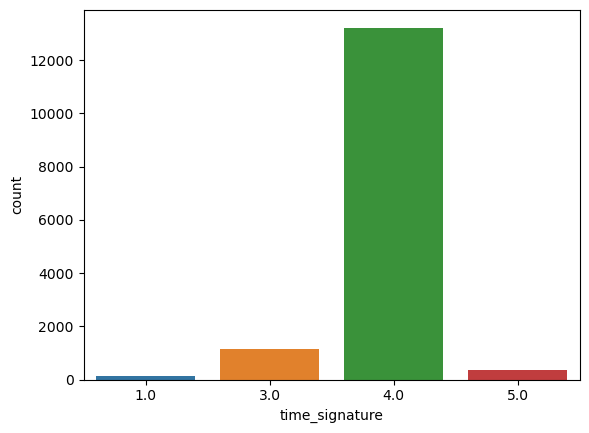

In [247]:
sns.countplot(data=df_2, x='time_signature')
plt.show()

<Axes: xlabel='time_signature'>

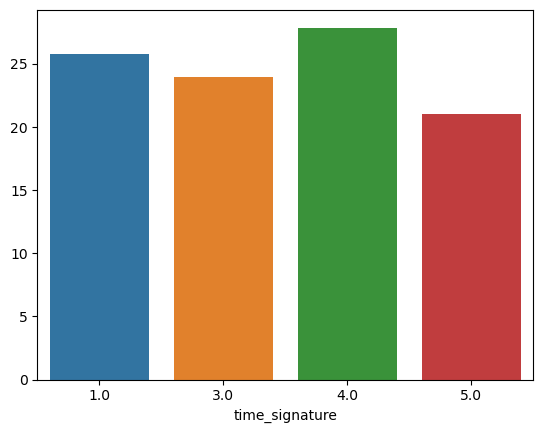

In [248]:
time_signature_pop = df_2.groupby('time_signature')['popularity'].mean()
sns.barplot(x=time_signature_pop.index, y=time_signature_pop.values)

#### Mode 

<Axes: xlabel='key', ylabel='count'>

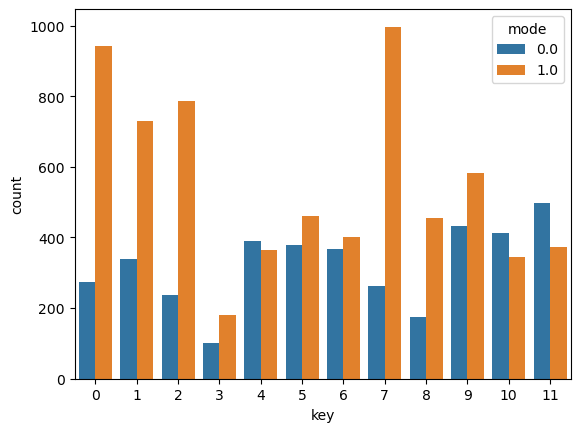

In [249]:
sns.countplot(data=df_2, x="key", hue="mode", )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'j-dance'),
  Text(1, 0, 'iranian'),
  Text(2, 0, 'black-metal'),
  Text(3, 0, 'bluegrass'),
  Text(4, 0, 'happy'),
  Text(5, 0, 'industrial'),
  Text(6, 0, 'j-idol'),
  Text(7, 0, 'spanish'),
  Text(8, 0, 'sleep'),
  Text(9, 0, 'techno'),
  Text(10, 0, 'mandopop'),
  Text(11, 0, 'afrobeat'),
  Text(12, 0, 'disney'),
  Text(13, 0, 'study'),
  Text(14, 0, 'indian'),
  Text(15, 0, 'idm'),
  Text(16, 0, 'forro'),
  Text(17, 0, 'chicago-house'),
  Text(18, 0, 'brazil'),
  Text(19, 0, 'breakbeat')])

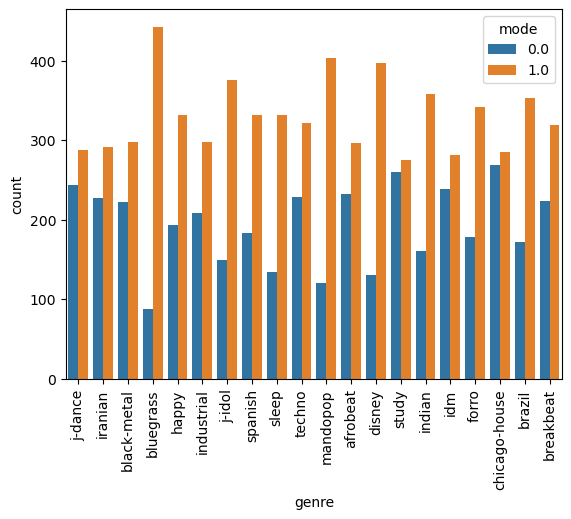

In [250]:
sns.countplot(data=df_2, x="genre", hue="mode")
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, '1.0'), Text(1, 0, '3.0'), Text(2, 0, '4.0'), Text(3, 0, '5.0')])

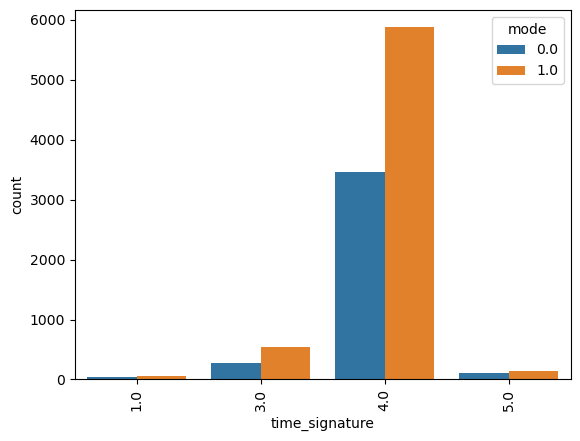

In [251]:
sns.countplot(data=df_2, x="time_signature", hue="mode")
plt.xticks(rotation=90)

<Axes: xlabel='processing', ylabel='Density'>

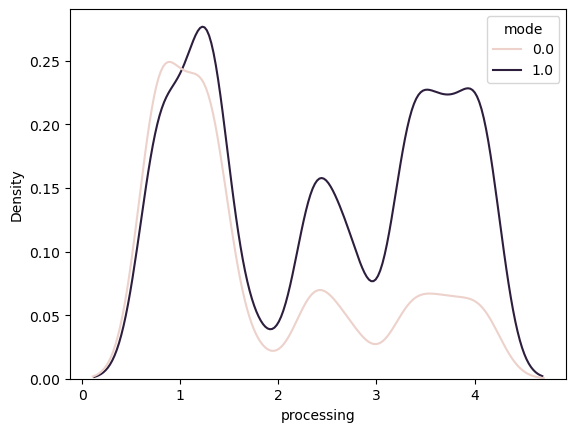

In [252]:
sns.kdeplot(data=df_2, x="processing", hue="mode")

<Axes: xlabel='key', ylabel='Density'>

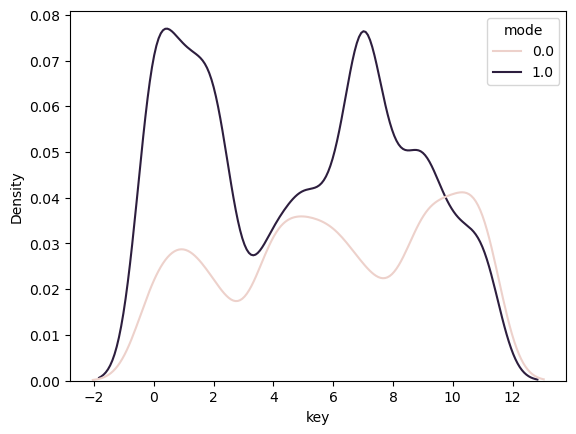

In [253]:
sns.kdeplot(data=df_2, x="key", hue="mode")

<Axes: xlabel='mode', ylabel='count'>

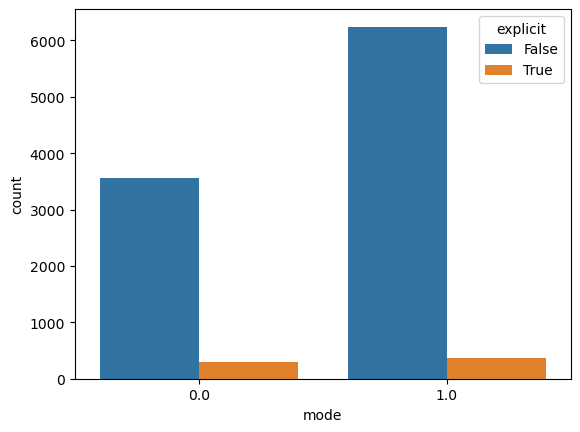

In [254]:
sns.countplot(data=df_2, x="mode", hue="explicit", )

In [255]:
#test n_bars and n_beat, we need to analyze both columns and try to make a new features that consider both of them in combinated way, try to analyze seperately

In [256]:
# Identify number of missing value in Mode column
df_2['mode'].isnull().sum()

4421

In [257]:
# Find mode values
df_2['mode']

0        1.0
1        0.0
2        NaN
3        1.0
4        1.0
        ... 
14995    NaN
14996    1.0
14997    NaN
14998    1.0
14999    1.0
Name: mode, Length: 14908, dtype: float64

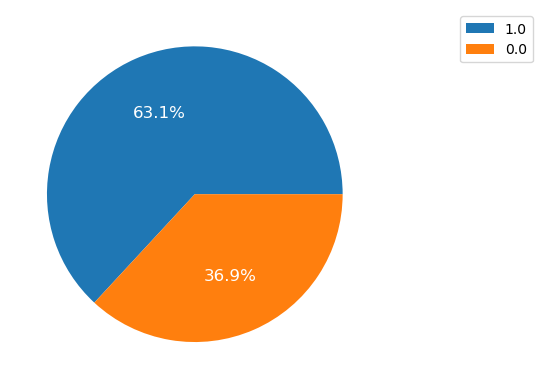

In [258]:
# visualize distribution of mode values
plot = df_2['mode'].value_counts().plot.pie(legend=True,autopct='%1.1f%%',textprops=dict(color="w",size="12"))
plot.legend(bbox_to_anchor=(1.2,1), loc="upper left")
plot.axes.get_yaxis().set_visible(False)

In [259]:
df_2[df_2['mode'].isnull()][['genre', 'time_signature', 'key']]

,genre,time_signature,key
2,black-metal,4.0,2
5,industrial,4.0,5
7,spanish,4.0,4
8,sleep,4.0,6
13,mandopop,4.0,4
...,...,...,...
14987,happy,4.0,4
14990,bluegrass,4.0,0
14991,j-dance,4.0,5
14995,idm,4.0,1


In [260]:
time_signature_lack_mode = df_2[df_2['mode'].isnull()]['time_signature']
time_signature_lack_mode

2        4.0
5        4.0
7        4.0
8        4.0
13       4.0
        ... 
14987    4.0
14990    4.0
14991    4.0
14995    4.0
14997    4.0
Name: time_signature, Length: 4421, dtype: float64

sns.histplot(data=time_signature_lack_mode)

In [261]:
df_2.isnull().sum()

name                   0
duration_ms            0
explicit               0
popularity             0
artists                0
album_name             0
danceability           0
energy                 0
key                    0
loudness               0
mode                4421
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
n_beats                0
n_bars                 0
processing             0
genre                  0
dtype: int64

In [262]:
# fulfil random the value of "mode" attribute
fill = df_2['mode'].value_counts(normalize=True)
missing = df_2['mode'].isnull()
df_2.loc[missing,'mode'] = np.random.choice(fill.index, size=len(df_2[missing]),p=fill.values)

In [263]:
df_2.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing
count,1.490800e+04,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000
mean,2.470663e+05,27.377784,0.554442,0.659497,5.286155,-8.815686,0.628790,0.084293,0.302775,0.284396,0.215342,0.439520,123.870017,3.917226,504.937148,129.180105,2.200511
std,1.218264e+05,18.601602,0.189982,0.261184,3.583102,5.892755,0.483145,0.086728,0.328747,0.381813,0.193361,0.275959,30.540521,0.431522,278.790418,74.669518,1.213228
min,1.580000e+04,0.000000,0.053200,0.000020,0.000000,-46.591000,0.000000,0.022800,0.000000,0.000000,0.011600,0.000000,30.322000,1.000000,36.000000,8.000000,0.748116
25%,1.806095e+05,14.000000,0.445000,0.483000,2.000000,-10.546500,0.000000,0.037500,0.009652,0.000000,0.097700,0.200000,99.987000,4.000000,329.000000,83.000000,1.170953
50%,2.282150e+05,24.000000,0.581000,0.711000,5.000000,-7.273000,1.000000,0.051300,0.154000,0.002880,0.131000,0.419000,124.687000,4.000000,463.000000,117.000000,1.738916
75%,2.891878e+05,42.000000,0.696000,0.885000,8.000000,-5.088000,1.000000,0.089125,0.570000,0.739000,0.279000,0.665000,142.015250,4.000000,626.000000,160.000000,3.349057
max,4.120258e+06,88.000000,0.980000,1.000000,11.000000,3.156000,1.000000,0.939000,0.996000,1.000000,0.994000,0.995000,220.525000,5.000000,7348.000000,2170.000000,4.067086


In [264]:
df_2.isnull().sum()

name                0
duration_ms         0
explicit            0
popularity          0
artists             0
album_name          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
n_beats             0
n_bars              0
processing          0
genre               0
dtype: int64

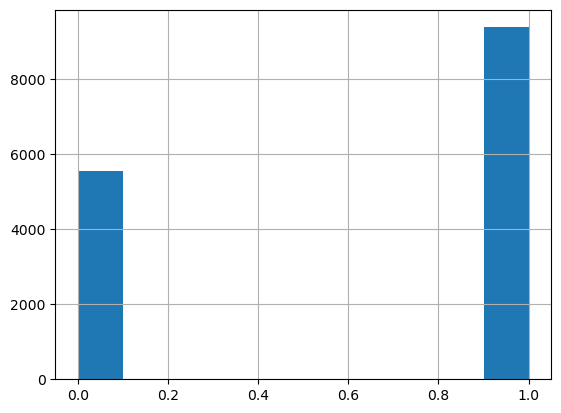

In [265]:
df_2['mode'].hist()
plt.show()

### Scatter plot 

<Axes: xlabel='n_beats', ylabel='duration_ms'>

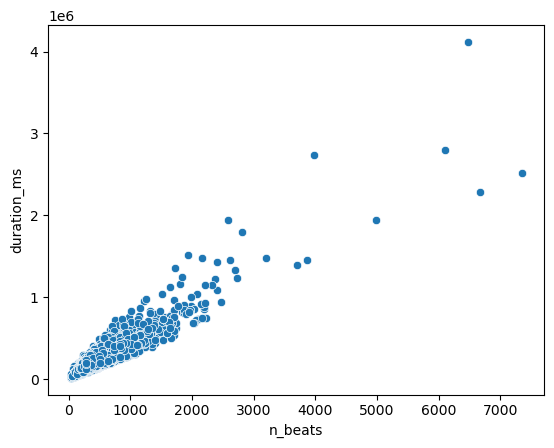

In [266]:
#n_beats vs duration_ms
sns.scatterplot(data=df_2, x='n_beats', y='duration_ms')

<Axes: xlabel='n_bars', ylabel='duration_ms'>

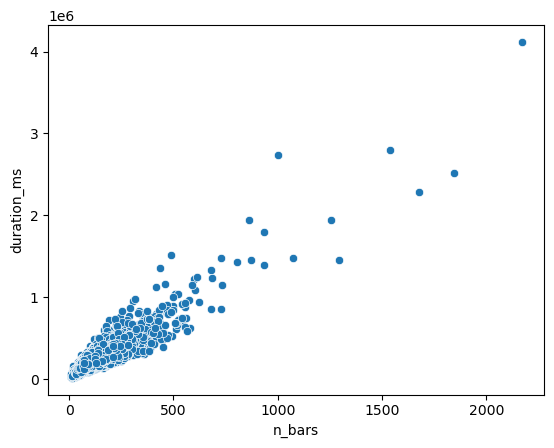

In [267]:
#n_bars vs duration_ms
sns.scatterplot(data=df_2, x='n_bars', y='duration_ms')

<Axes: xlabel='n_beats', ylabel='n_bars'>

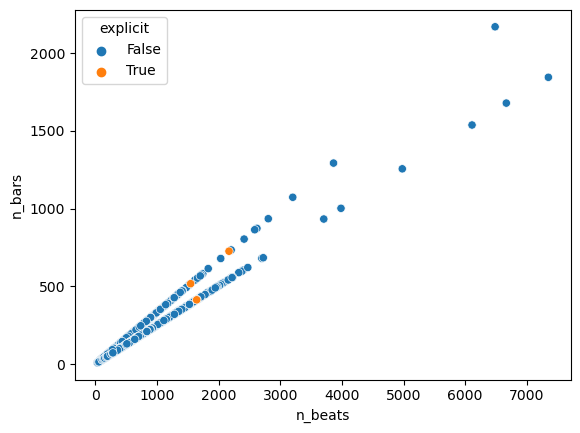

In [268]:
#n_beats vs n_bars
sns.scatterplot(data=df_2, x='n_beats', y='n_bars', hue='explicit')

<Axes: xlabel='acousticness', ylabel='energy'>

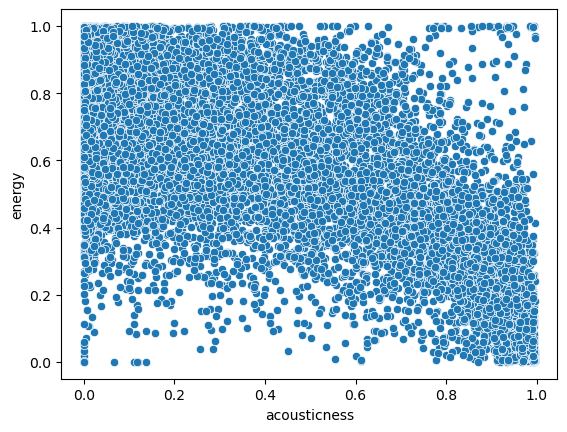

In [269]:
#acousticness vs energy
sns.scatterplot(data=df_2, x='acousticness', y='energy')

<Axes: xlabel='loudness', ylabel='energy'>

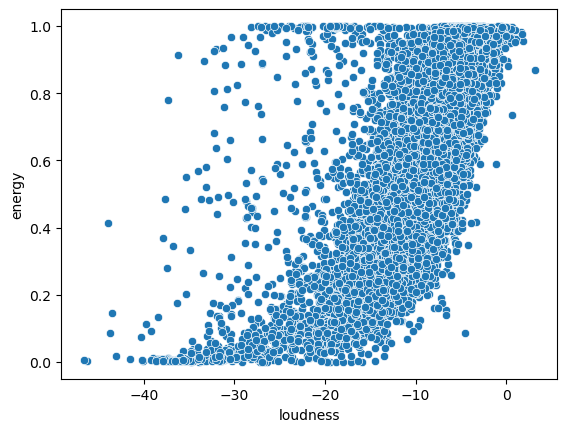

In [270]:
#loudness vs energy
sns.scatterplot(data=df_2, x='loudness', y='energy')

<Axes: xlabel='valence', ylabel='danceability'>

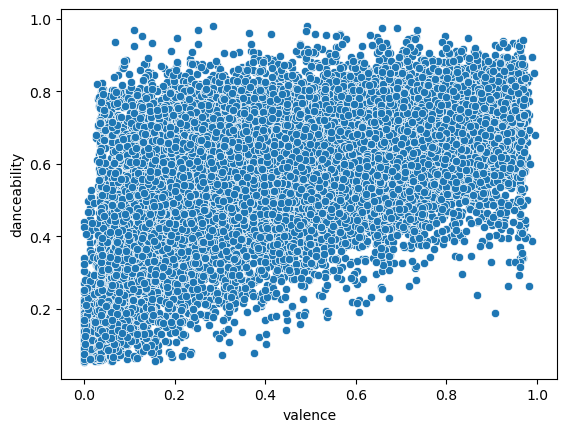

In [271]:
#valence vs danceability
sns.scatterplot(data=df_2, x='valence', y='danceability')

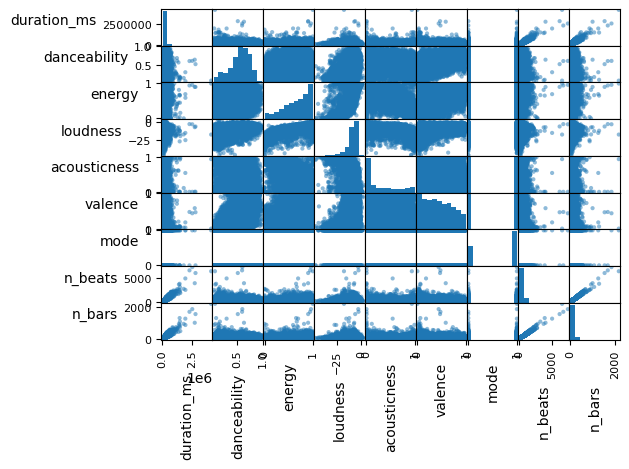

In [272]:
axes = pd.plotting.scatter_matrix(df_2[['duration_ms', 'danceability', 'energy', 
                                    'loudness', 'acousticness','valence', 'mode',
                                    'n_beats','n_bars']])
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [273]:
# Overview of summary (explicit V.S. no explicit)
explicit_summary = df_2.groupby('explicit')
explicit_summary.mean()

C:\Users\minhd\AppData\Local\Temp\ipykernel_13184\328702037.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  explicit_summary.mean()


,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing
explicit,,,,,,,,,,,,,,,,,
False,248731.116196,27.438890,0.551753,0.651038,5.286975,-9.019193,0.632621,0.077590,0.312616,0.296885,0.214881,0.439073,123.779106,3.912208,508.102640,130.016856,2.202453
True,223038.332298,26.495859,0.593256,0.781586,5.274327,-5.878540,0.573499,0.181037,0.160743,0.104148,0.221997,0.445972,125.182102,3.989648,459.250518,117.103520,2.172482


In [274]:
#describe new dataset
df_2.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing
count,1.490800e+04,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000
mean,2.470663e+05,27.377784,0.554442,0.659497,5.286155,-8.815686,0.628790,0.084293,0.302775,0.284396,0.215342,0.439520,123.870017,3.917226,504.937148,129.180105,2.200511
std,1.218264e+05,18.601602,0.189982,0.261184,3.583102,5.892755,0.483145,0.086728,0.328747,0.381813,0.193361,0.275959,30.540521,0.431522,278.790418,74.669518,1.213228
min,1.580000e+04,0.000000,0.053200,0.000020,0.000000,-46.591000,0.000000,0.022800,0.000000,0.000000,0.011600,0.000000,30.322000,1.000000,36.000000,8.000000,0.748116
25%,1.806095e+05,14.000000,0.445000,0.483000,2.000000,-10.546500,0.000000,0.037500,0.009652,0.000000,0.097700,0.200000,99.987000,4.000000,329.000000,83.000000,1.170953
50%,2.282150e+05,24.000000,0.581000,0.711000,5.000000,-7.273000,1.000000,0.051300,0.154000,0.002880,0.131000,0.419000,124.687000,4.000000,463.000000,117.000000,1.738916
75%,2.891878e+05,42.000000,0.696000,0.885000,8.000000,-5.088000,1.000000,0.089125,0.570000,0.739000,0.279000,0.665000,142.015250,4.000000,626.000000,160.000000,3.349057
max,4.120258e+06,88.000000,0.980000,1.000000,11.000000,3.156000,1.000000,0.939000,0.996000,1.000000,0.994000,0.995000,220.525000,5.000000,7348.000000,2170.000000,4.067086


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'duration_ms'),
  Text(2, 0, 'explicit'),
  Text(3, 0, 'popularity'),
  Text(4, 0, 'danceability'),
  Text(5, 0, 'energy'),
  Text(6, 0, 'key'),
  Text(7, 0, 'loudness'),
  Text(8, 0, 'mode'),
  Text(9, 0, 'speechiness'),
  Text(10, 0, 'acousticness'),
  Text(11, 0, 'instrumentalness'),
  Text(12, 0, 'liveness'),
  Text(13, 0, 'valence'),
  Text(14, 0, 'tempo'),
  Text(15, 0, 'time_signature'),
  Text(16, 0, 'n_beats'),
  Text(17, 0, 'n_bars'),
  Text(18, 0, 'processing')])

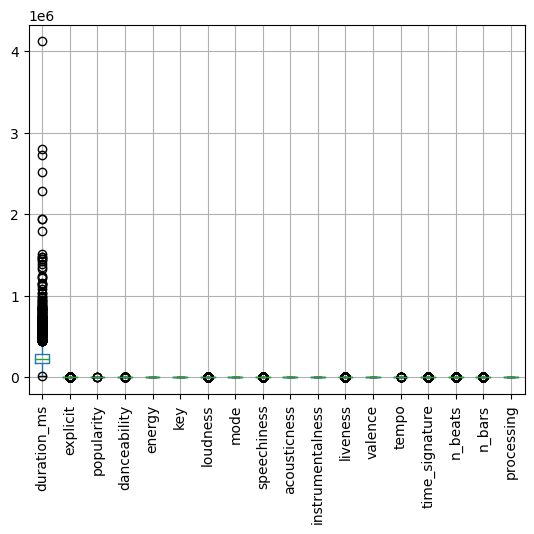

In [275]:
df_2.boxplot()
plt.xticks(rotation=90)

#### Remove outliers from the new dataset
We exploited the metric of Z-Score.

In [276]:
# use z-score to remove outliers
import scipy.stats as stats
from scipy.stats import zscore 

In [277]:
column = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 
                                    'loudness', 'mode','speechiness', 'acousticness',
                                   'instrumentalness', 'liveness', 'valence', 
                                    'tempo' , 'time_signature','n_beats','n_bars','processing']
for col in column:
    z = np.abs(stats.zscore(df_2[col]))
    threshold = 3
    
    print(col,np.where(z > 3))

duration_ms (array([  109,   162,   232,   374,   376,   795,   880,   902,   935,
        1061,  1367,  1395,  1472,  1624,  1752,  1917,  1937,  2045,
        2072,  2163,  2198,  2234,  2309,  2407,  2487,  2697,  2968,
        2989,  3005,  3161,  3270,  3482,  3511,  3513,  3629,  3770,
        3831,  3928,  4269,  4320,  4328,  4457,  4516,  4520,  5029,
        5036,  5305,  5428,  5511,  5975,  5976,  6014,  6058,  6164,
        6168,  6229,  6272,  6300,  6360,  6656,  6917,  6930,  7296,
        7376,  7576,  7968,  7973,  8056,  8101,  8137,  8161,  8233,
        8238,  8473,  8640,  8665,  8693,  8747,  8775,  8837,  9048,
        9249,  9259,  9320,  9396,  9562,  9571,  9626,  9631,  9712,
        9824, 10056, 10062, 10141, 10175, 10188, 10392, 10633, 10742,
       11075, 11295, 11326, 11495, 11661, 11711, 11747, 12055, 12083,
       12138, 12280, 12297, 12443, 12449, 12464, 12717, 12721, 12756,
       12781, 12796, 12811, 13100, 13482, 13579, 13758, 13780, 13901,
       

In [278]:
# create a copy of the original DataFrame
df_final = df_2.copy()
# iterate through each column to remove outliers
for col in column:
    z = np.abs(stats.zscore(df_final[col]))
    threshold = 3
    df_final = df_final[(z < threshold)]

In [279]:
df_final

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.302000,0.536000,0.2810,0.6350,142.221,4.0,567.0,141.0,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.283000,0.934000,0.3600,0.0336,75.596,4.0,617.0,155.0,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.000089,0.800000,0.2620,0.4890,116.628,4.0,652.0,162.0,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.066400,0.001270,0.1170,0.3850,140.880,4.0,619.0,155.0,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.000576,0.096900,0.2990,0.6370,143.956,4.0,733.0,183.0,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.016000,0.615000,0.1320,0.0335,117.319,4.0,837.0,212.0,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.548000,0.940000,0.1230,0.0016,92.323,3.0,277.0,92.0,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.001830,0.857000,0.0713,0.0708,126.000,4.0,837.0,209.0,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.000337,0.000014,0.4020,0.2700,160.044,4.0,513.0,130.0,1.279305,breakbeat


<Axes: xlabel='duration_ms'>

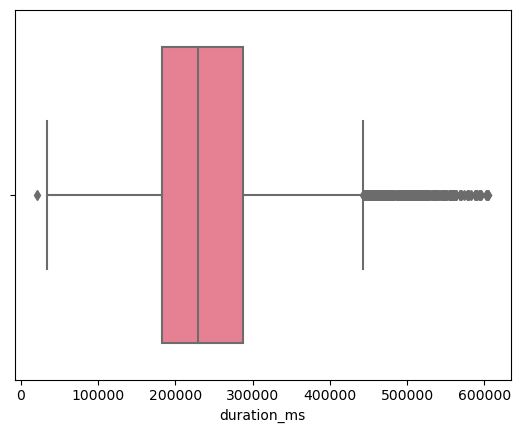

In [280]:
sns.boxplot(x=df_final['duration_ms'], palette="husl")

In [281]:
for col in column:
    z = np.abs(stats.zscore(df_final[col]))
    print(col, np.where(z > 3))

duration_ms (array([   31,    55,   123,   208,   292,   408,   420,   448,   496,
         700,   730,   793,   978,  1148,  1245,  1352,  1617,  1679,
        1743,  1767,  1817,  2025,  2173,  2241,  2278,  2388,  2411,
        2544,  2585,  2682,  2880,  3059,  3139,  3332,  3762,  3987,
        4011,  4047,  4069,  4175,  4292,  4293,  4495,  4677,  4680,
        4817,  4891,  4918,  5015,  5355,  5363,  5467,  5554,  5580,
        5654,  5724,  5796,  5918,  6008,  6052,  6066,  6233,  6280,
        6440,  6553,  6633,  6666,  6817,  6908,  6940,  7167,  7182,
        7348,  7494,  7577,  7620,  7741,  7881,  8206,  8447,  8485,
        8623,  8789,  8912,  8987,  9057,  9138,  9334,  9387,  9504,
        9654,  9922,  9949,  9955,  9960, 10010, 10501, 10531, 10561,
       10794, 10796, 10836, 11065, 11135, 11186, 11414, 11425, 11481,
       11519, 11594, 11743, 11865, 11960, 11975, 12053, 12101, 12404,
       12681, 12778, 12819, 12911, 13069, 13166], dtype=int64),)
popularity (

<Axes: xlabel='liveness'>

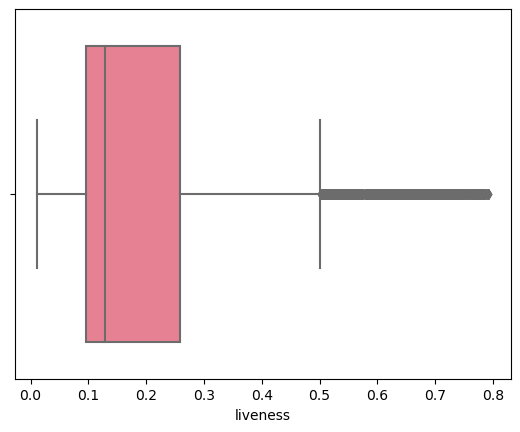

In [282]:
sns.boxplot(x=df_final['liveness'], palette="husl")

In [283]:
df_final.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing
count,13264.000000,13264.000000,13264.000000,13264.000000,13264.000000,13264.000000,13264.000000,13264.000000,13264.000000,13264.000000,13264.000000,13264.000000,13264.000000,13264.000000,13264.000000,13264.000000,13264.000000
mean,241333.727232,27.451146,0.570628,0.670598,5.318230,-8.095396,0.629900,0.074607,0.286058,0.270213,0.192475,0.455232,124.419679,3.954312,493.931242,125.582102,2.195484
std,88684.936753,18.560567,0.178183,0.246962,3.573485,4.488600,0.482849,0.061925,0.318450,0.374236,0.147343,0.270835,29.694655,0.285928,213.992246,54.945936,1.214534
min,21240.000000,0.000000,0.053200,0.000020,0.000000,-26.440000,0.000000,0.022800,0.000000,0.000000,0.011800,0.000000,36.950000,3.000000,37.000000,8.000000,0.748116
25%,182732.250000,14.000000,0.467000,0.496000,2.000000,-10.045250,0.000000,0.036800,0.007875,0.000000,0.096400,0.224000,100.076750,4.000000,337.000000,85.000000,1.170953
50%,229560.000000,24.000000,0.592000,0.718000,6.000000,-7.091000,1.000000,0.050100,0.137000,0.002055,0.128000,0.437500,124.963500,4.000000,465.500000,118.000000,1.738916
75%,286957.000000,42.000000,0.703000,0.884000,8.000000,-4.999000,1.000000,0.084500,0.535000,0.695250,0.258250,0.674000,141.983750,4.000000,620.000000,158.000000,3.349057
max,605100.000000,83.000000,0.980000,1.000000,11.000000,3.156000,1.000000,0.344000,0.996000,1.000000,0.792000,0.995000,212.276000,5.000000,1177.000000,295.000000,4.067086


In [284]:
# define a threshold for identifying outliers
threshold = 3

# create a DataFrame to store outlier counts for each column
outlier_counts = pd.DataFrame(columns=["Column", "Outlier Count"])

# iterate through each column and count outliers
for col in column:
    z = np.abs(stats.zscore(df_2[col]))
    outlier_count = len(np.where(z > threshold)[0])
    outlier_counts = outlier_counts.append({"Column": col, "Outlier Count": outlier_count}, ignore_index=True)
print(outlier_counts)

              Column Outlier Count
0        duration_ms           137
1         popularity             6
2       danceability             0
3             energy             0
4                key             0
5           loudness           392
6               mode             0
7        speechiness           418
8       acousticness             0
9   instrumentalness             0
10          liveness           484
11           valence             0
12             tempo             6
13    time_signature           149
14           n_beats           121
15            n_bars           130
16        processing             0


C:\Users\minhd\AppData\Local\Temp\ipykernel_13184\287518587.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({"Column": col, "Outlier Count": outlier_count}, ignore_index=True)
C:\Users\minhd\AppData\Local\Temp\ipykernel_13184\287518587.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({"Column": col, "Outlier Count": outlier_count}, ignore_index=True)
C:\Users\minhd\AppData\Local\Temp\ipykernel_13184\287518587.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({"Column": col, "Outlier Count": outlier_count}, ignore_index=True)
C:\Users\minhd\AppData\Local\Temp\ipykernel_13184\287518587.py:11: Future

In [285]:
# Define a threshold for identifying outliers
threshold = 3

# Create a DataFrame to store outlier counts for each column
outlier_counts_1 = pd.DataFrame(columns=["Column", "Outlier Count"])

# Iterate through each column and count outliers
for col in column:
    z1 = np.abs(stats.zscore(df_final[col]))
    outlier_count_1 = len(np.where(z1 > threshold)[0])
    outlier_counts_1 = outlier_counts_1.append({"Column": col, "Outlier Count": outlier_count}, ignore_index=True)

# Print the table of outlier counts
print(outlier_counts_1)

              Column Outlier Count
0        duration_ms             0
1         popularity             0
2       danceability             0
3             energy             0
4                key             0
5           loudness             0
6               mode             0
7        speechiness             0
8       acousticness             0
9   instrumentalness             0
10          liveness             0
11           valence             0
12             tempo             0
13    time_signature             0
14           n_beats             0
15            n_bars             0
16        processing             0


C:\Users\minhd\AppData\Local\Temp\ipykernel_13184\1398573430.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts_1 = outlier_counts_1.append({"Column": col, "Outlier Count": outlier_count}, ignore_index=True)
C:\Users\minhd\AppData\Local\Temp\ipykernel_13184\1398573430.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts_1 = outlier_counts_1.append({"Column": col, "Outlier Count": outlier_count}, ignore_index=True)
C:\Users\minhd\AppData\Local\Temp\ipykernel_13184\1398573430.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts_1 = outlier_counts_1.append({"Column": col, "Outlier Count": outlier_count}, ignore_index=True)
C:\Users\minhd\AppData\Local\Temp\ipykernel_13184\13985734

In [286]:
Q1 = df_final[column].quantile(0.25)
Q3 = df_final[column].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=df_final[column][(df_final[column]>upper_whisker)|(df_final[column]<lower_whisker)]
index

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,444000.0,NaN,0.069,NaN,NaN,-24.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14996,NaN,NaN,0.103,NaN,NaN,-19.627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
14997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [287]:
df_final

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.302000,0.536000,0.2810,0.6350,142.221,4.0,567.0,141.0,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.283000,0.934000,0.3600,0.0336,75.596,4.0,617.0,155.0,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.000089,0.800000,0.2620,0.4890,116.628,4.0,652.0,162.0,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.066400,0.001270,0.1170,0.3850,140.880,4.0,619.0,155.0,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.000576,0.096900,0.2990,0.6370,143.956,4.0,733.0,183.0,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.016000,0.615000,0.1320,0.0335,117.319,4.0,837.0,212.0,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.548000,0.940000,0.1230,0.0016,92.323,3.0,277.0,92.0,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.001830,0.857000,0.0713,0.0708,126.000,4.0,837.0,209.0,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.000337,0.000014,0.4020,0.2700,160.044,4.0,513.0,130.0,1.279305,breakbeat


In [288]:
count_of_zeros1 = (df_final['loudness'] > 0.0).sum()
count_of_zeros1

17

In [289]:
# remove value >= 0 of "loudness" attribute because its range from -60 to 0
df_final = df_final[df_final['loudness'] <= 0]
df_final

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.302000,0.536000,0.2810,0.6350,142.221,4.0,567.0,141.0,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.283000,0.934000,0.3600,0.0336,75.596,4.0,617.0,155.0,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.000089,0.800000,0.2620,0.4890,116.628,4.0,652.0,162.0,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.066400,0.001270,0.1170,0.3850,140.880,4.0,619.0,155.0,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.000576,0.096900,0.2990,0.6370,143.956,4.0,733.0,183.0,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.016000,0.615000,0.1320,0.0335,117.319,4.0,837.0,212.0,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.548000,0.940000,0.1230,0.0016,92.323,3.0,277.0,92.0,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.001830,0.857000,0.0713,0.0708,126.000,4.0,837.0,209.0,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.000337,0.000014,0.4020,0.2700,160.044,4.0,513.0,130.0,1.279305,breakbeat


In [290]:
df_final.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing
count,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000,13247.000000
mean,241408.644825,27.462973,0.570776,0.670251,5.320072,-8.106869,0.629878,0.074506,0.286361,0.270168,0.192352,0.455288,124.413158,3.954254,494.095040,125.625274,2.195270
std,88674.103460,18.558927,0.178078,0.246920,3.574205,4.479938,0.482855,0.061843,0.318533,0.374270,0.147274,0.270791,29.691267,0.285843,214.020869,54.953954,1.214737
min,21240.000000,0.000000,0.053200,0.000020,0.000000,-26.440000,0.000000,0.022800,0.000000,0.000000,0.011800,0.000000,36.950000,3.000000,37.000000,8.000000,0.748116
25%,182780.000000,14.000000,0.467000,0.496000,2.000000,-10.049000,0.000000,0.036800,0.007895,0.000000,0.096400,0.224000,100.077000,4.000000,337.000000,85.000000,1.170953
50%,229615.000000,24.000000,0.592000,0.717000,6.000000,-7.100000,1.000000,0.050100,0.137000,0.002050,0.128000,0.437000,124.962000,4.000000,466.000000,118.000000,1.738916
75%,286966.500000,42.000000,0.703000,0.884000,8.000000,-5.006000,1.000000,0.084300,0.536000,0.696000,0.258000,0.674000,141.980000,4.000000,620.000000,158.000000,3.349057
max,605100.000000,83.000000,0.980000,1.000000,11.000000,-0.150000,1.000000,0.344000,0.996000,1.000000,0.792000,0.995000,212.276000,5.000000,1177.000000,295.000000,4.067086


In [192]:
df_final.to_csv('E:\Data Science and Business Informatics\Data Mining\Data Mining 1\Project\df_final1.csv')

C:\Users\minhd\AppData\Local\Temp\ipykernel_13184\884138966.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(), annot=True, fmt='.1g', cmap="Greens_r", cbar=False);


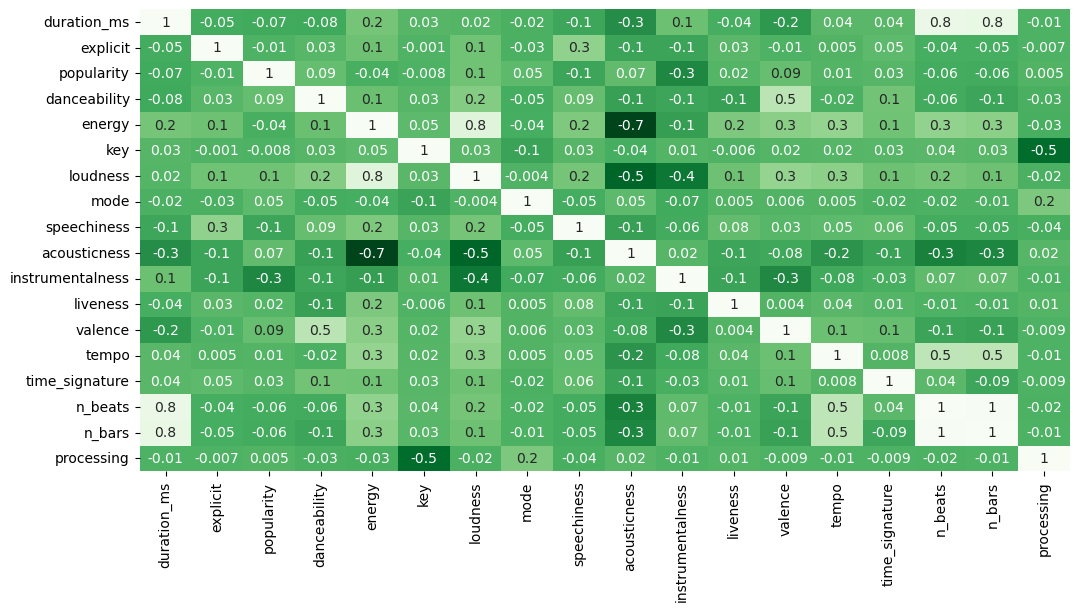

In [193]:
# visualize a look at the correlation matrix 
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df_final.corr(), annot=True, fmt='.1g', cmap="Greens_r", cbar=False);